In [4]:
# This is to illustrate basi Time series analysis using Random data
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [5]:
def plot_series(time, series, format="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

In [6]:
def trend(time, slope=0):
    return slope * time

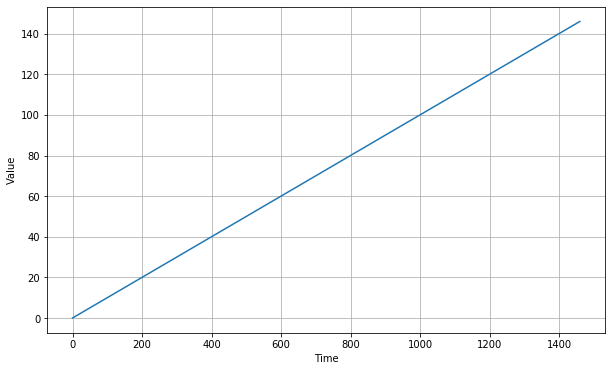

In [7]:
time = np.arange(4*365 + 1)
baseline = 10
series = trend(time, 0.1)

plt.figure(figsize=(10,6))
plot_series(time, series)
plt.show()

In [8]:
# Definition for seasonality and season pattern
def seasonal_pattern(season_time):
    return np.where(season_time < 0.4,
                   np.cos(season_time*2*np.pi),
                   1/np.exp(3*season_time))

def seasonality(time, period, amplitude=1, phase=0):
    season_time = ((time+phase)%period)/period
    return amplitude * seasonal_pattern(season_time)

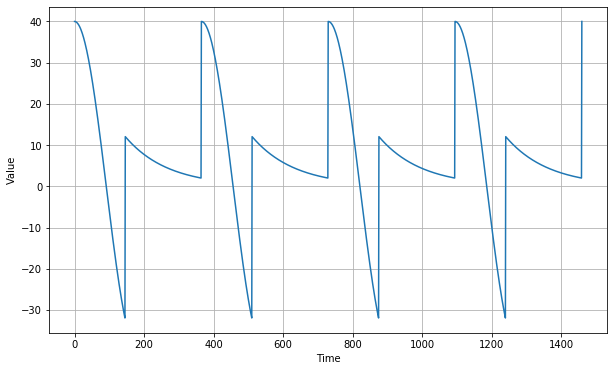

In [9]:
baseline = 10
amplitude = 40
series = seasonality(time, period=365, amplitude=amplitude)

plt.figure(figsize=(10,6))
plot_series(time, series)
plt.show()

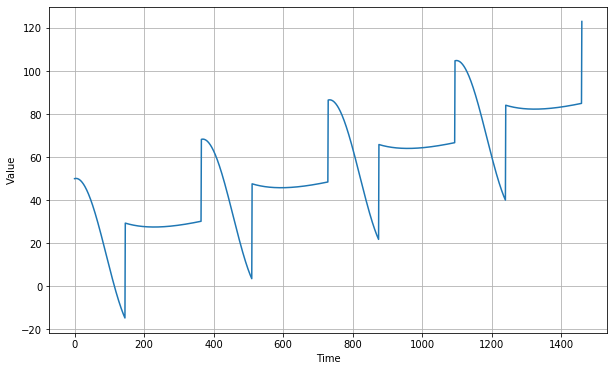

In [14]:
slope = 0.05
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

In [19]:
#Introducing White noise
def white_noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time))*noise_level

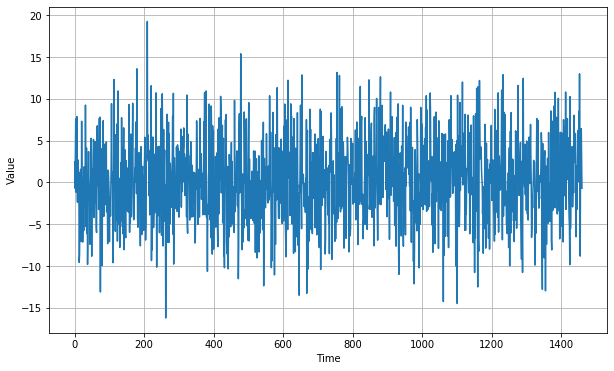

In [20]:
noise_level = 5
noise = white_noise(time, noise_level, seed=42)

plt.figure(figsize=(10,6))
plot_series(time, noise)
plt.show()

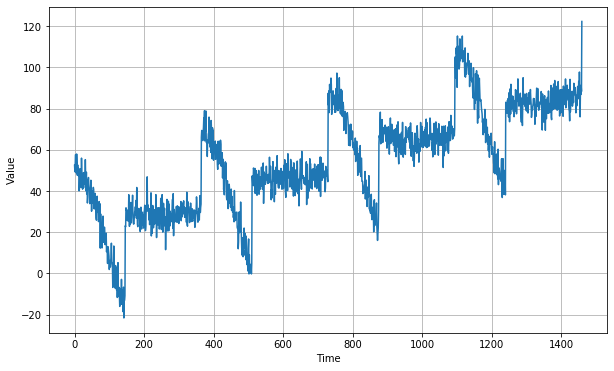

In [21]:
series += noise

plt.figure(figsize=(10,6))
plot_series(time, series)
plt.show()

In [23]:
#trend forecast with time split at step 1000
split_time = 1000
#:split_time referes to training set from beginning of series to the split_time
time_train = time[:split_time]
x_train = series[:split_time]
#split_time: refers to validation set from split_time to the end of series
time_valid = time[split_time:]
x_valid = series[split_time:]

In [25]:
def autocorrelation(time, amplitude, seed=None):
    rnd = np.random.RandomState(seed)
    a1 = 0.5
    a2 = -0.1
    ar = rnd.randn(len(time) + 50)
    ar[:50] = 100
    for step in range(50, len(time)+ 50):
        ar[step] += a1 * ar[step - 50]
        ar[step] += a2 * ar[step - 33]
    return ar[50:] * amplitude